In [104]:
from dad.data import *
from dad.config import *

import os
import torch

train_dataset = data.DrivingImageDataset(folder_path=IMAGES_PATH, split='train', label_path=LABEL_PATH, use_key_attribs=True)
num_attributes = train_dataset.get_num_attribs()
img_shape = (3, *IMAGE_SIZE)
latent_dim = 100

cuda = True
device = "cuda" if cuda else "cpu"

In [ ]:
# Visualize dataset
import matplotlib.pyplot as plt

def plot_sample_from_ds(dataset, weather, scene, timeofday, num=5):
    counter = 0
    for i in range(len(dataset)):
        attribs = dataset.json[i]["attributes"]
        if attribs["weather"] == weather and attribs["scene"] == scene and attribs["timeofday"] == timeofday:
            x, y = dataset[i]
            plt.imshow((x.permute(1, 2, 0) + 1) / 2.)
            plt.axis('off')
            plt.show()
            counter += 1
        if counter >= num:
            break

plot_sample_from_ds(train_dataset, "cloudy", "residential", "night")
        

In [105]:
# Dc_Gdc
from dad.model.Dc_Gdc import cDCGenerator, Discriminator

epoch = 28
model_path = os.path.join(LOG_PATH, "Dc_Gdc", "ckpt", f"generator_{epoch}.pth")

generator = cDCGenerator(num_attributes, latent_dim)
generator.load_state_dict(torch.load(model_path))
if cuda:
    generator.cuda()
generator.eval()
print(generator)

cDCGenerator(
  (label_embedding): Linear(in_features=10, out_features=32, bias=False)
  (model): Sequential(
    (0): ConvTranspose2d(132, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

3852


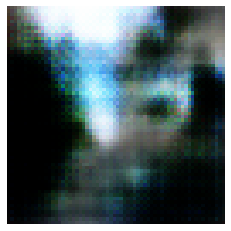

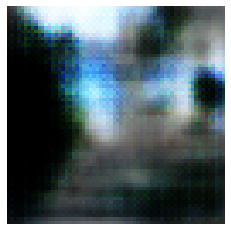

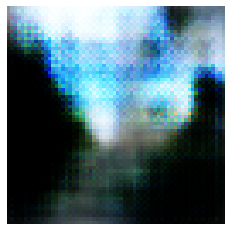

In [255]:
# Visualize generated images
import matplotlib.pyplot as plt

def visualize_generated_image(weather, scene, timeofday, z=None):
    label = train_dataset.generate_attribute(weather=weather, scene=scene, timeofday=timeofday, cuda=cuda)
    if z is None:
        z = torch.randn(1, latent_dim, device=device)
    gen_imgs = generator(z, label)[0, :]
    img = gen_imgs.detach().cpu().numpy()
    img = (img + 1.) / 2.
    plt.axis('off')
    plt.imshow(img.transpose(1, 2, 0))
    plt.show()

# 400, 555, 45, 6442
# 1567, 437, 1091, 5242
seed = np.random.randint(10000)
print(seed)
# seed = 45
torch.manual_seed(seed)
z = torch.randn(1, latent_dim, device=device)
# visualize_generated_image(weather="clear", scene="city street", timeofday="daytime", z=z)
# visualize_generated_image(weather="clear", scene="city street", timeofday="dawn/dusk", z=z)
# visualize_generated_image(weather="clear", scene="city street", timeofday="night", z=z)

# 45
# visualize_generated_image(weather="clear", scene="residential", timeofday="daytime", z=z)
# visualize_generated_image(weather="cloudy", scene="residential", timeofday="daytime", z=z)
# visualize_generated_image(weather="rainy", scene="residential", timeofday="daytime", z=z)

visualize_generated_image(weather="clear", scene="city street", timeofday="daytime", z=z)
visualize_generated_image(weather="clear", scene="residential", timeofday="daytime", z=z)
visualize_generated_image(weather="clear", scene="highway", timeofday="daytime", z=z)



torch.Size([3, 64, 64])
<PIL.Image.Image image mode=RGB size=64x64 at 0x7F59D00D2110>


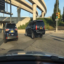

In [158]:
# Generate and save 2048 samples
from PIL import Image
import numpy as np

x, y = train_dataset[0]
print(x.shape)
x = (x.numpy() + 1.) / 2. * 255.
x = x.astype(np.uint8)
img = Image.fromarray(x.transpose(1, 2, 0))
print(img)
display(img)
